In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
cd ..

/Users/alphonsowoodbury/DS/mod2project/flatiron_mod2_project_kch


In [3]:
#importing data
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
#data cleaning:
#changing question marks to 0.0
df = df.replace('?', 0.0)

#changing all column object types to floats (except date column)
df.loc[:, df.columns != 'date'] = df.loc[:,df.columns != 'date'].astype('float')

#changing all 0.0 in sqft_basement column, yr_renovated, and waterfront columns to NaN values
df['sqft_basement'] = df['sqft_basement'].replace(0.0 , np.nan)
df['waterfront'] = df.waterfront.replace(0.0, np.nan)
df['yr_renovated'] =df['yr_renovated'].replace(0.0, np.nan)
#changing date column to datetime values
df['date'] = pd.to_datetime(df['date'])

In [5]:
#Feature Engineering:
#creating has_basement, has_waterfront, has_renovation columns with True/False values
df['has_waterfront'] = df['waterfront'].notnull()
df['has_basement'] = df['sqft_basement'].notnull()
df['has_renovation'] = df['yr_renovated'].notnull()
#creating eff_built column (which updates built year depending on whether it was renovated or not)
df.loc[df['yr_renovated'].notnull(), 'eff_built'] = df['yr_renovated']
df.loc[df['yr_renovated'].isnull(), 'eff_built'] = df['yr_built']

In [6]:
#Creating new dataframe with desired columns:
df = df[['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','yr_built','zipcode',\
         'sqft_living15','sqft_lot15','has_basement','has_waterfront','has_renovation','eff_built']]

In [7]:
df.loc[:, df.columns != 'date'] = df.loc[:,df.columns != 'date'].astype('int')

In [14]:
df.to_csv('kc_cleaned.csv',index=False)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,has_basement,has_waterfront,has_renovation,eff_built
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,3,7,1955,98178,1340,5650,0,0,0,1955
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,3,7,1951,98125,1690,7639,1,0,1,1991
2,5631500400,2015-02-25,180000,2,1,770,10000,1,3,6,1933,98028,2720,8062,0,0,0,1933
3,2487200875,2014-12-09,604000,4,3,1960,5000,1,5,7,1965,98136,1360,5000,1,0,0,1965
4,1954400510,2015-02-18,510000,3,2,1680,8080,1,3,8,1987,98074,1800,7503,0,0,0,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000,3,2,1530,1131,3,3,8,2009,98103,1530,1509,0,0,0,2009
21593,6600060120,2015-02-23,400000,4,2,2310,5813,2,3,8,2014,98146,1830,7200,0,0,0,2014
21594,1523300141,2014-06-23,402101,2,0,1020,1350,2,3,7,2009,98144,1020,2007,0,0,0,2009
21595,291310100,2015-01-16,400000,3,2,1600,2388,2,3,8,2004,98027,1410,1287,0,0,0,2004


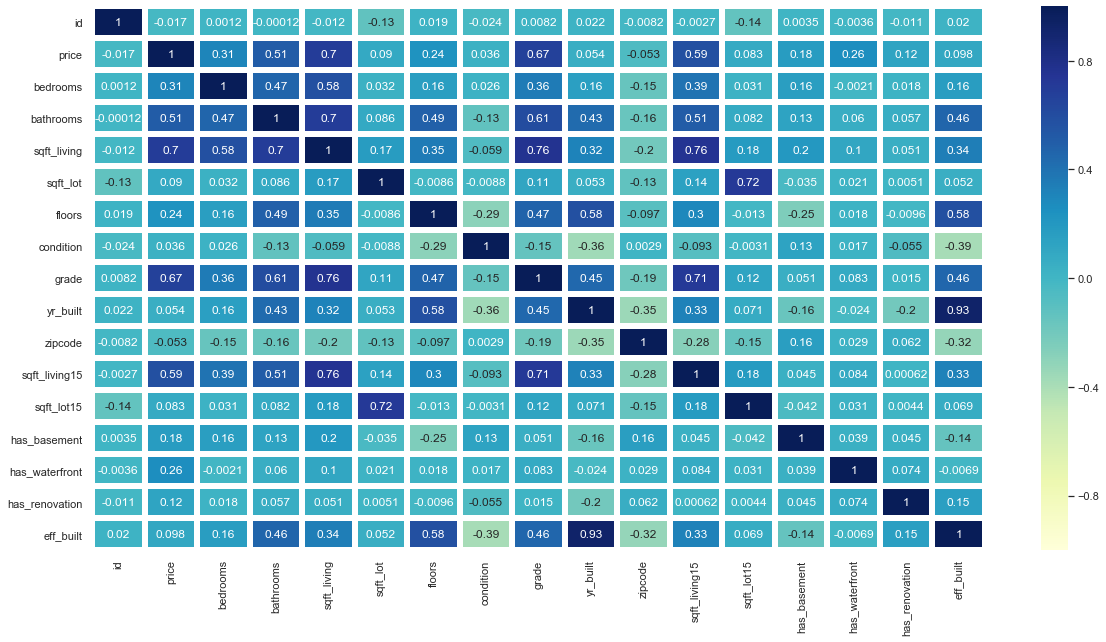

In [10]:
#Correlation Heatmap
df_corr = df.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(df_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True, cmap = 'YlGnBu' )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
plt.show()